# RECOMMENDATION SYSTEM 



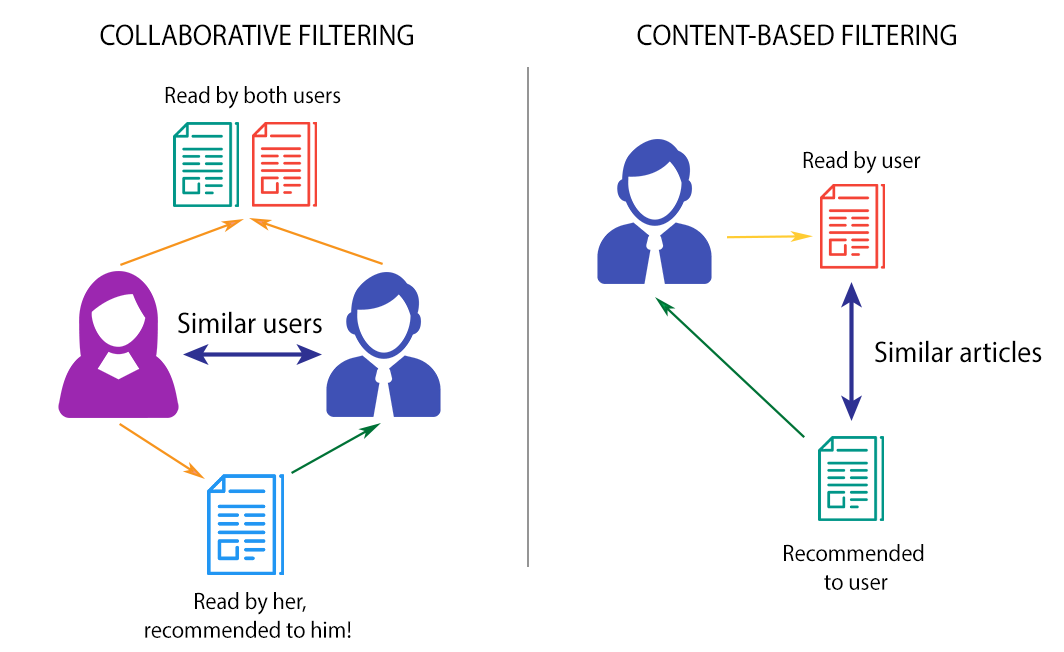

In [ ]:
#Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
%matplotlib inline

In [2]:
#Load the data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Movie.csv')
df

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
8987,7087,GoldenEye (1995),3.0
8988,7088,GoldenEye (1995),1.0
8989,7105,GoldenEye (1995),2.0
8990,7113,GoldenEye (1995),3.0


# EDA

In [ ]:
#Checking unique users and movies

In [4]:
df['userId'].nunique()

4081

In [5]:
df['movie'].nunique()

10

# Data Visualization

In [ ]:
#Countplot

<Axes: xlabel='count', ylabel='movie'>

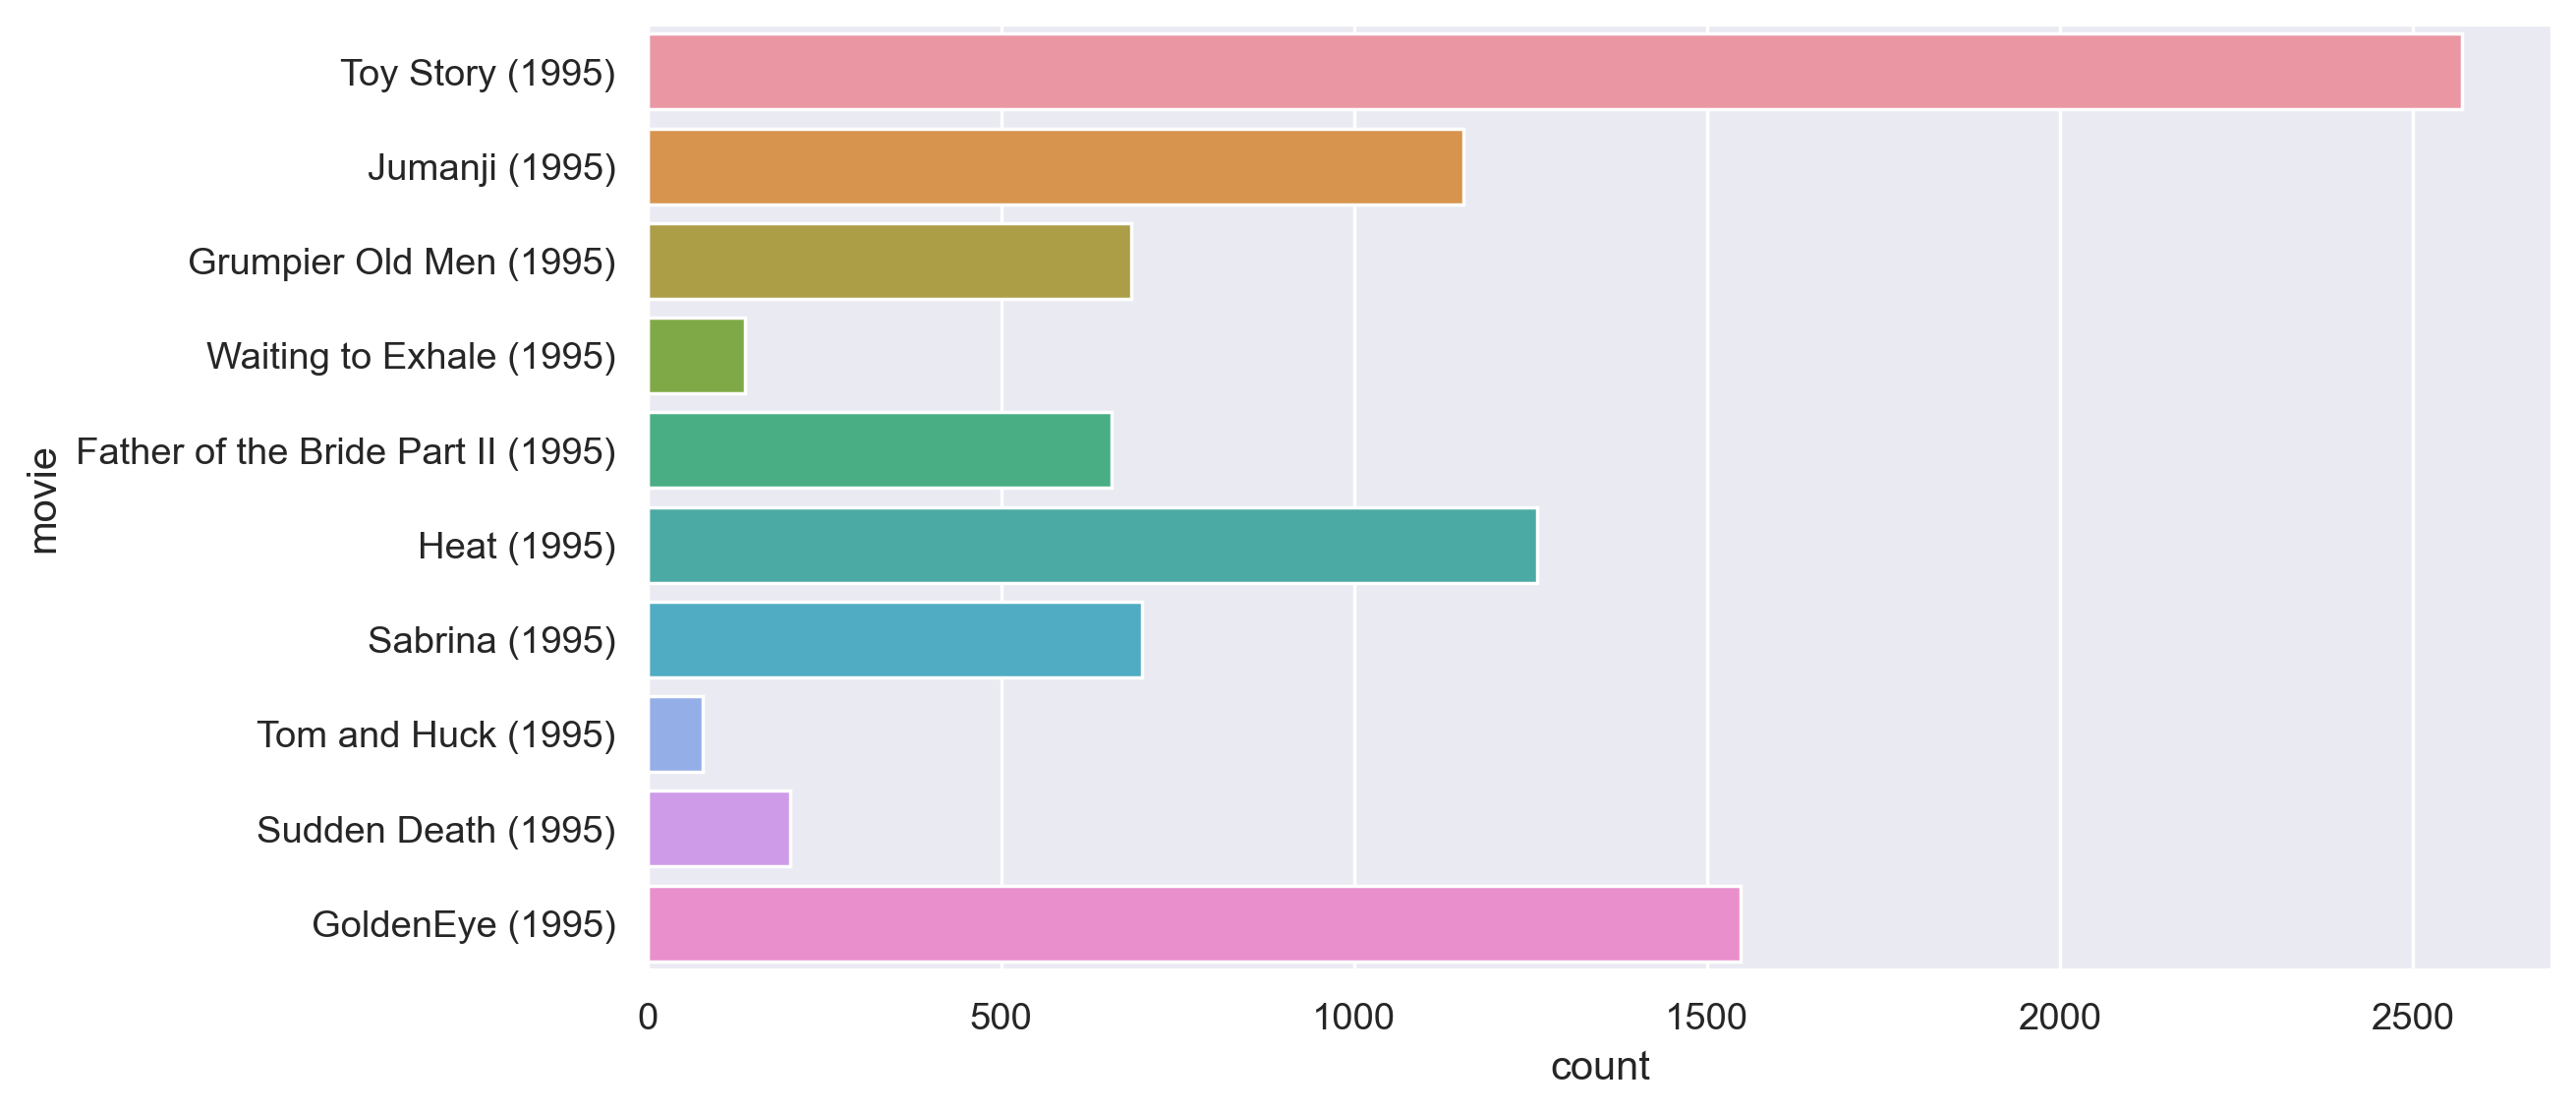

In [8]:
sns.countplot(y = df['movie'])

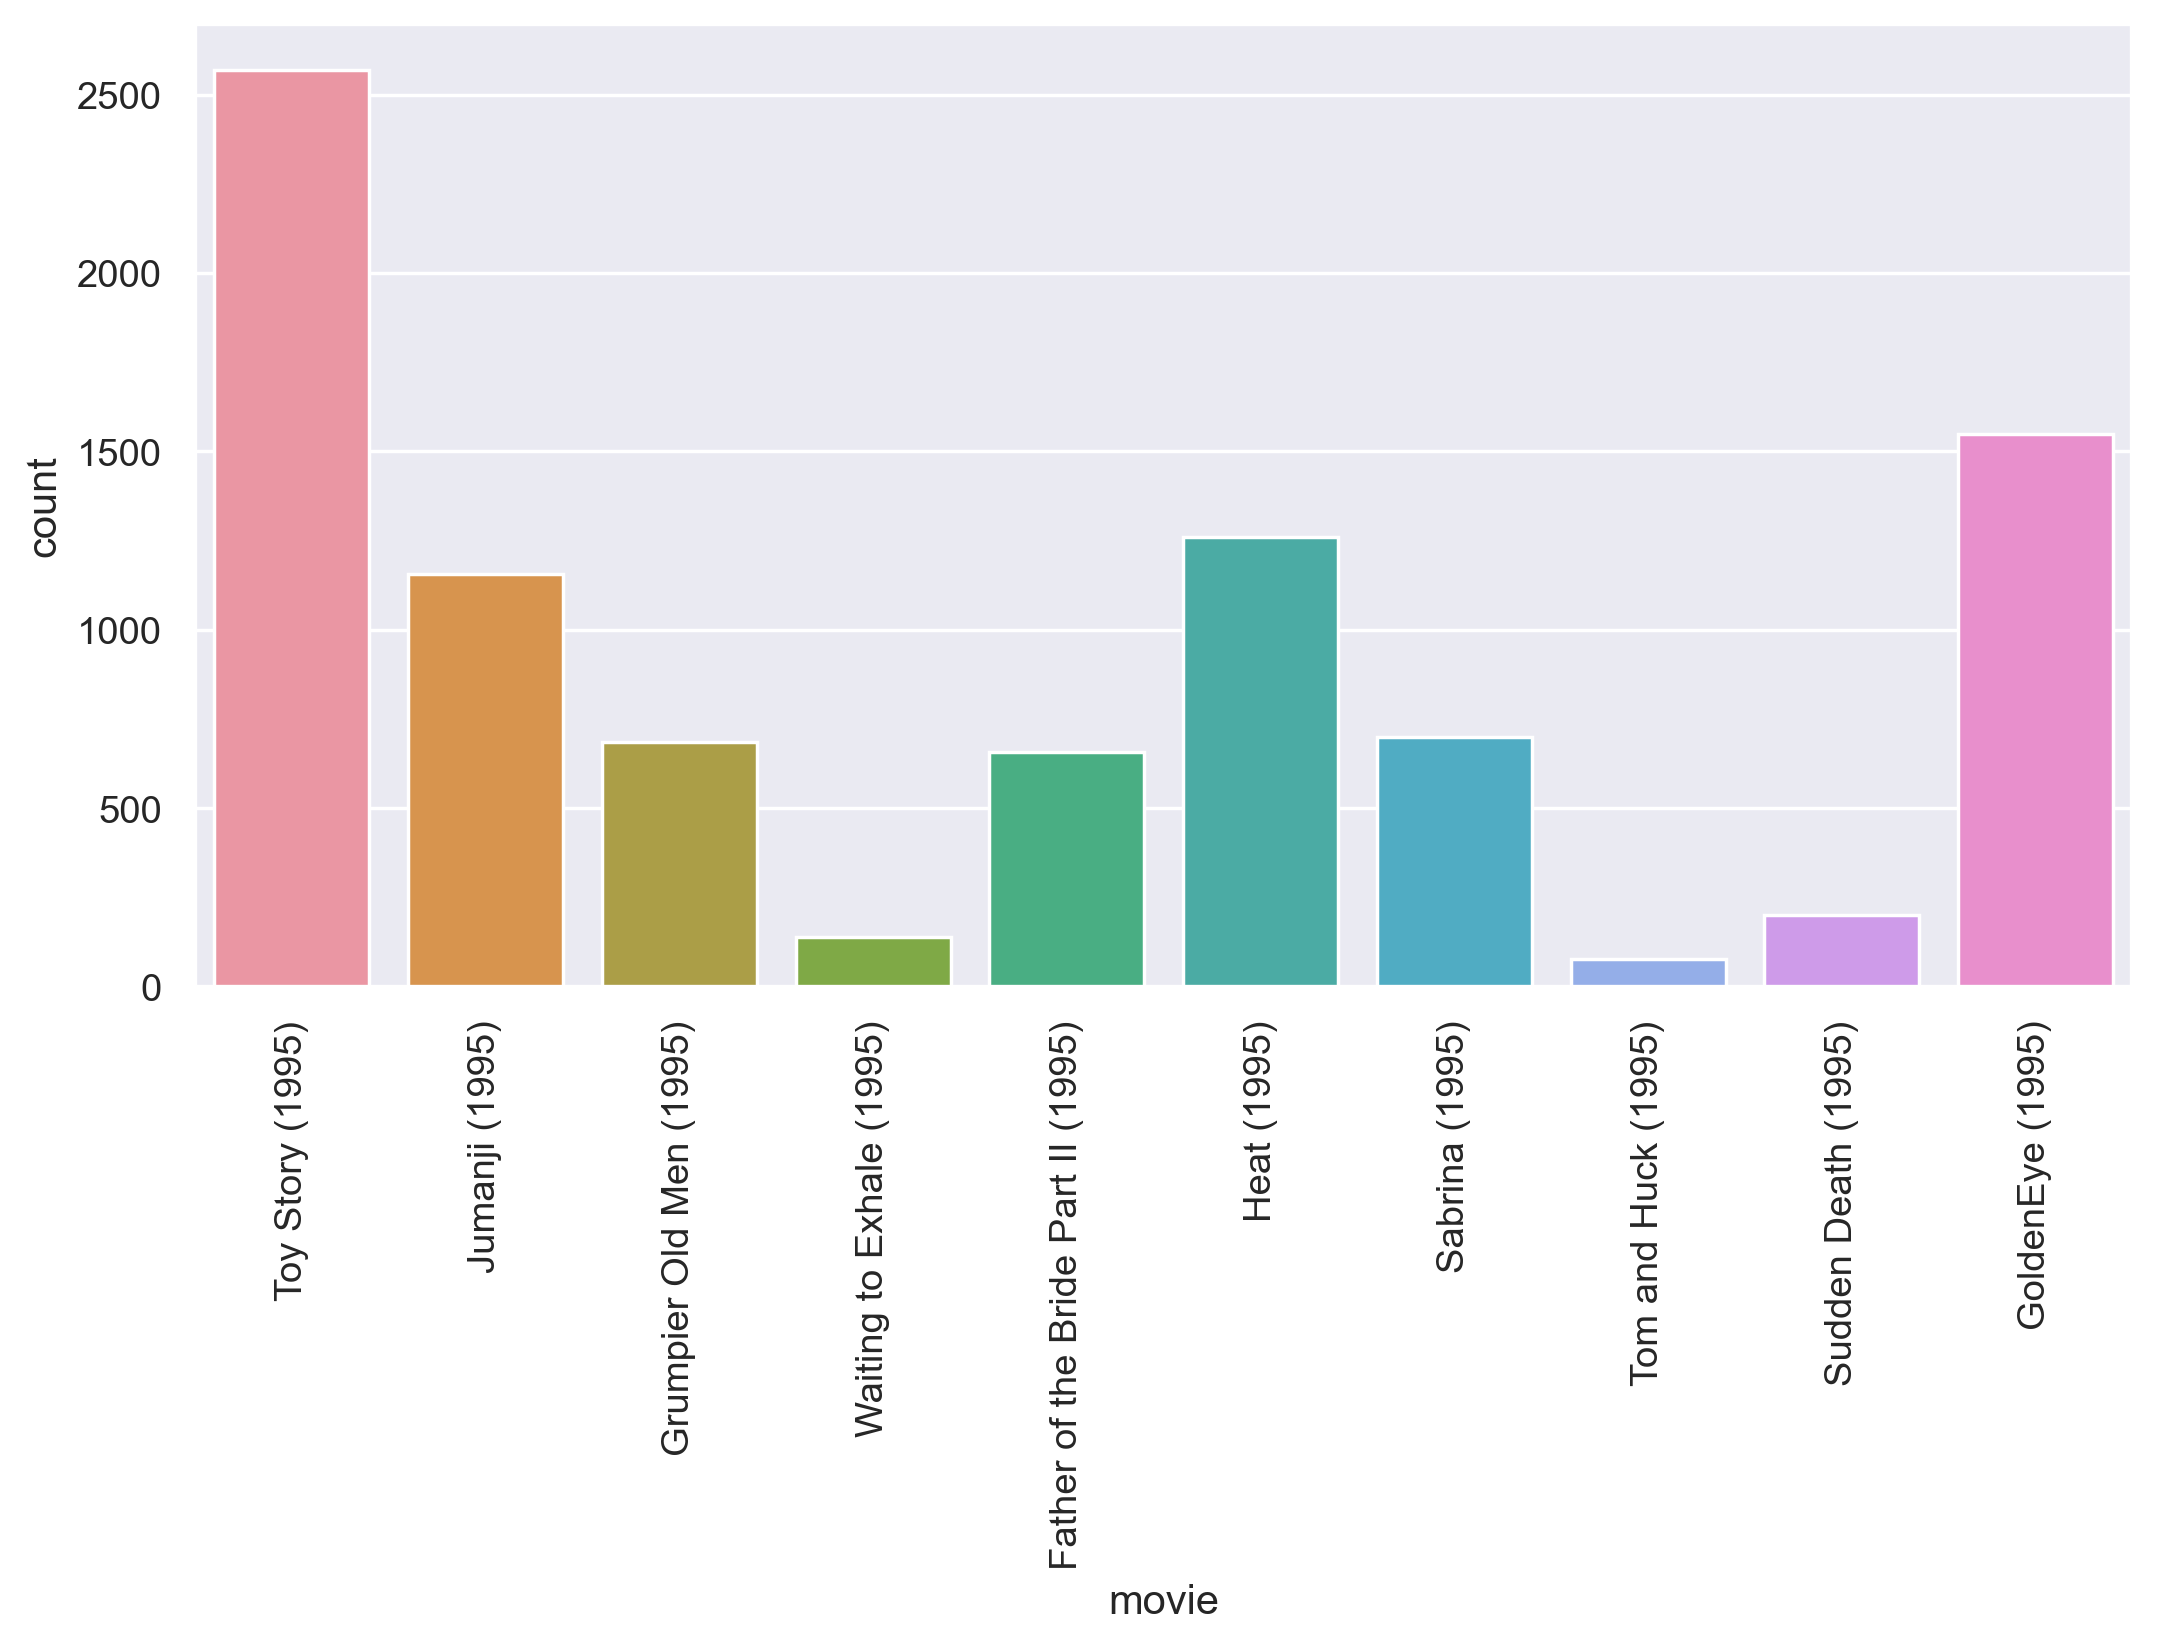

In [12]:
sns.countplot(x = df['movie'])
plt.xticks(rotation = 90)
plt.show()

In [13]:
df['movie'].value_counts()

Toy Story (1995)                      2569
GoldenEye (1995)                      1548
Heat (1995)                           1260
Jumanji (1995)                        1155
Sabrina (1995)                         700
Grumpier Old Men (1995)                685
Father of the Bride Part II (1995)     657
Sudden Death (1995)                    202
Waiting to Exhale (1995)               138
Tom and Huck (1995)                     78
Name: movie, dtype: int64

# Model building

In [ ]:
#User to user based data

In [14]:
df

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
8987,7087,GoldenEye (1995),3.0
8988,7088,GoldenEye (1995),1.0
8989,7105,GoldenEye (1995),2.0
8990,7113,GoldenEye (1995),3.0


In [15]:
pivot = pd.pivot(data=df, index = 'userId',columns='movie', values='rating')

In [16]:
pivot

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7116,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
7117,NaN,3.0,4.0,5.0,NaN,3.0,1.0,NaN,4.0,NaN


In [ ]:
pivot.fillna(0,inplace=True)

In [ ]:
pivot

In [ ]:
#Calculate the distances and similarity

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
pairwise_distances(pivot,metric='cosine')

In [ ]:
pd.DataFrame(pairwise_distances(pivot,metric='cosine'))

In [ ]:
pd.DataFrame(1 - pairwise_distances(pivot, metric='cosine'))

In [ ]:
df.head(3)

In [ ]:
sim = 1 - pairwise_distances(pivot, metric='cosine')
pd.DataFrame(sim)

In [ ]:
sim

In [ ]:
np.fill_diagonal(sim,0)

In [ ]:
df

In [ ]:
similarity = pd.DataFrame(sim)
similarity

In [ ]:
df['userId'].unique()

In [ ]:
similarity.index = df['userId'].unique()
similarity.columns = df['userId'].unique()

In [ ]:
similarity

In [ ]:
#Find out similar users

In [ ]:
similarity.idxmax()

In [ ]:
df[(df['userId'] == 3) | (df['userId'] == 11)]

In [ ]:
df[(df['userId'] == 7087) | (df['userId'] == 8)]